In [2]:
#Finding Predictors of Price for Housing in WA 

#Frame the Problem and Look at the Big Picture:
#Objective: What model is the best predictor for housing price based on this data set?

#In the real world this information could help with individuals trying
#to sell their homes and price them appropriately, or with individuals
#trying to buy a home to see if they're getting a good price.

#Assumptions: This data could be flawed. There could be important variables
#that are not included or other external economic factors that may have
#impacted prices during this time period.

In [3]:
#Import necessary packages
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [4]:
#Import data
path = "/Users/ellacathey/Downloads/archive (1)/data.csv"
df = pd.read_csv(path)

In [6]:
#How many data points do we have?
df.shape

(4600, 18)

In [7]:
#View sample of data to get familiar with it
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [8]:
#List data types
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [10]:
#Observations from sample and list of data types:
    #date should be in datetime64 format
    #waterfront, view, and condition are assigned int values without explanation
    #if the house was not renovated, yr_renovated = 0
    #street is entire address

In [11]:
#Date should be in datetime64 format
df["date"] = pd.to_datetime(df["date"], infer_datetime_format = True)
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [12]:
#waterfront, view, and condition are assigned int values without explanation
#Find value counts of each to determine what possible values are for each variable

waterfront_counts = df['waterfront'].value_counts().to_frame()
waterfront_counts.rename(columns = {'waterfront':'waterfront_counts'}, inplace=True)
waterfront_counts

,waterfront_counts
0,4567
1,33


In [13]:
view_counts = df['view'].value_counts().to_frame()
view_counts.rename(columns = {'view':'view_counts'}, inplace=True)
view_counts

,view_counts
0,4140
2,205
3,116
4,70
1,69


In [14]:
condition_counts = df['condition'].value_counts().to_frame()
condition_counts.rename(columns = {'condition':'condition_counts'}, inplace=True)
condition_counts

,condition_counts
3,2875
4,1252
5,435
2,32
1,6


In [15]:
#Observations:
    #Waterfront has a 0 or 1 value for yes or no. I will assume 0 = no and 1 = yes.
    #View is on a scale from 0-4. I will assume this is from worst to best with 0 having no view at all
    #Condition is on a scale from 1-5. I will assume this is from worst to best.

In [16]:
#Are there any missing values?
#This will print the number of missing values.
x = df.size
df.dropna(axis =0, inplace=True)
print(x-df.size) 

0


In [17]:
#Now that we have a better understanding of the data and it has been cleaned,
#we can begin to explore which variables are strongly correlated to price.

In [18]:
#Display correlations
correlations = df.corrwith(df['price']).to_frame()
correlations.rename(columns = {0:'price'}, inplace=True)
correlations

,price
price,1.000000
bedrooms,0.200336
bathrooms,0.327110
sqft_living,0.430410
sqft_lot,0.050451
floors,0.151461
waterfront,0.135648
view,0.228504
condition,0.034915
sqft_above,0.367570


In [19]:
#Sort correlations to see which variable is most highly correlated with price
correlations = correlations.sort_values(by=['price'], axis=0, ascending = False, inplace=False)
correlations

,price
price,1.000000
sqft_living,0.430410
sqft_above,0.367570
bathrooms,0.327110
view,0.228504
sqft_basement,0.210427
bedrooms,0.200336
floors,0.151461
waterfront,0.135648
sqft_lot,0.050451


In [20]:
#Plot linear regression of highest correlated variable (sqft_living)

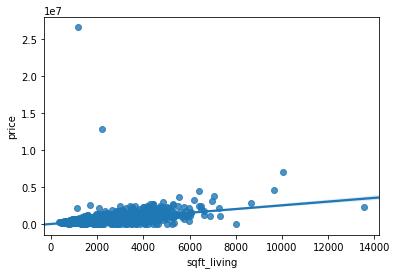

In [21]:
plot = sns.regplot(x="sqft_living", y="price", data=df)

(0, 4000000.0)

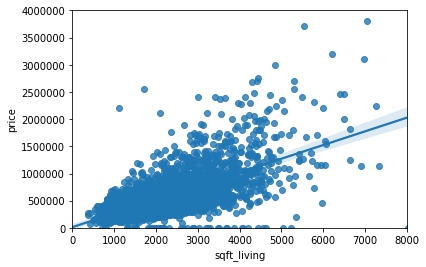

In [22]:
#Zoom in on populated area
plot = sns.regplot(x="sqft_living", y="price", data=df)
plt.xlim(0,8000)
plt.ylim(0,0.4e7)

In [23]:
stats.pearsonr(df['sqft_living'], df['price'])

(0.43041002543262796, 7.549895925396118e-207)

In [24]:
#Observations:
    #None of the correlation coefficients are that close to |1|, 
    #and even the highest correlation (sqft_living) is not great.

In [25]:
#Let's look at a categorial variable: city
df_test = df[['city','price']]
df_grp= df_test.groupby(['city'], as_index=False).mean()
df_grp.rename(columns ={'price':"avg_price"}, inplace=True)

df_grp = df_grp.sort_values(by=['avg_price'], ascending=False)
df_grp


,city,avg_price
22,Medina,2.046559e+06
8,Clyde Hill,1.321945e+06
43,Yarrow Point,1.194838e+06
23,Mercer Island,1.123818e+06
3,Bellevue,8.471807e+05
2,Beaux Arts Village,7.450000e+05
13,Fall City,6.926818e+05
33,Sammamish,6.869176e+05
31,Redmond,6.676495e+05
25,Newcastle,6.660467e+05


In [27]:
#We might want to know if price changes based on how many houses
#are for sale in that particular city.
val_counts = df['city'].value_counts().to_frame()
val_counts.rename(columns = {'city':"val_counts_of_city"}, inplace=True)
val_counts = val_counts.sort_index()
val_counts

,val_counts_of_city
Algona,5
Auburn,176
Beaux Arts Village,1
Bellevue,286
Black Diamond,9
Bothell,33
Burien,74
Carnation,22
Clyde Hill,11
Covington,43


In [28]:
#Add this variable to a dataframe with avg price and compare correlation coefficients.

# Declare list to be converted into a column 
val_list = val_counts['val_counts_of_city'].tolist()
 
# Using 'vals' as the column name and assign it to the list 
df_grp["houses_for_sale"] = val_list
  
# Display new table
df_grp

#Sort by price from highest to lowest:
df_grp.sort_values(by=['avg_price'], axis=0, ascending = False, inplace=False)

,city,avg_price,houses_for_sale
22,Medina,2.046559e+06,5
8,Clyde Hill,1.321945e+06,176
43,Yarrow Point,1.194838e+06,1
23,Mercer Island,1.123818e+06,286
3,Bellevue,8.471807e+05,9
2,Beaux Arts Village,7.450000e+05,33
13,Fall City,6.926818e+05,74
33,Sammamish,6.869176e+05,22
31,Redmond,6.676495e+05,11
25,Newcastle,6.660467e+05,43


In [29]:
#Find correlation between houses on the market in each city and price
df_grp.corr()

,avg_price,houses_for_sale
avg_price,1.000000,-0.095877
houses_for_sale,-0.095877,1.000000


(0, 2562554.1098112823)

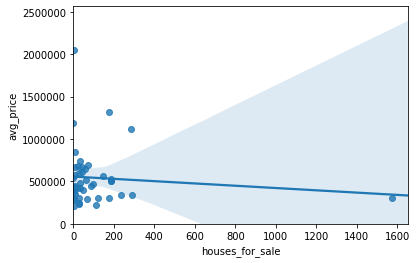

In [36]:
sns.regplot(x="houses_for_sale", y= "avg_price", data = df_grp)
plt.xlim(0,)
plt.ylim(0,)

In [31]:
#Observations:
    #Number of houses on the market in each city is not a good indicator of price.

In [32]:
#I still haven't found one great predictor of price, 
#so I'll try removing outliers from each column of the original data set.

In [37]:
#Create a new data frame that contains the z scores for each non-categorical variable

df_z = pd.DataFrame()

z_price = np.abs(stats.zscore(df['price']))
z_price = z_price.tolist()
df_z['z_price'] = z_price

z_bedrooms = np.abs(stats.zscore(df['bedrooms']))
z_bedrooms = z_bedrooms.tolist()
df_z['z_bedrooms'] = z_bedrooms

z_bathrooms = np.abs(stats.zscore(df['bathrooms']))
z_bathrooms = z_bathrooms.tolist()
df_z['z_bathrooms'] = z_bathrooms

z_sqft_living = np.abs(stats.zscore(df['sqft_living']))
z_sqft_living = z_sqft_living.tolist()
df_z['z_sqft_living'] = z_sqft_living

z_sqft_lot = np.abs(stats.zscore(df['sqft_lot']))
z_sqft_lot = z_sqft_lot.tolist()
df_z['z_sqft_lot'] = z_sqft_lot

z_floors = np.abs(stats.zscore(df['floors']))
z_floors = z_floors.tolist()
df_z['z_floors'] = z_floors

z_waterfront = np.abs(stats.zscore(df['waterfront']))
z_waterfront = z_waterfront.tolist()
df_z['z_waterfront'] = z_waterfront

z_view = np.abs(stats.zscore(df['view']))
z_view = z_view.tolist()
df_z['z_view'] = z_view

z_condition = np.abs(stats.zscore(df['condition']))
z_condition = z_condition.tolist()
df_z['z_condition'] = z_condition

z_sqft_above = np.abs(stats.zscore(df['sqft_above']))
z_sqft_above = z_sqft_above.tolist()
df_z['z_sqft_above'] = z_sqft_above

z_sqft_basement = np.abs(stats.zscore(df['sqft_basement']))
z_sqft_basement = z_sqft_basement.tolist()
df_z['z_sqft_basement'] = z_sqft_basement

z_yr_built = np.abs(stats.zscore(df['yr_built']))
z_yr_built = z_yr_built.tolist()
df_z['z_yr_built'] = z_yr_built

z_yr_renovated = np.abs(stats.zscore(df['yr_renovated']))
z_yr_renovated = z_yr_renovated.tolist()
df_z['z_yr_renovated'] = z_yr_renovated


df_z.head(10)


,z_price,z_bedrooms,z_bathrooms,z_sqft_living,z_sqft_lot,z_floors,z_waterfront,z_view,z_condition,z_sqft_above,z_sqft_basement,z_yr_built,z_yr_renovated
0,0.423864,0.441122,0.843204,0.829971,0.193434,0.022416,0.085004,0.309194,0.667112,0.565224,0.672464,0.531014,1.221670
1,3.249598,1.759705,0.432802,1.568528,0.161718,0.906555,0.085004,4.830079,2.286416,1.789559,0.069128,1.674693,0.825693
2,0.372424,0.441122,0.205201,0.217367,0.080978,0.951388,0.085004,0.309194,0.809652,0.119171,0.672464,0.161000,0.825693
3,0.234071,0.441122,0.113800,0.144686,0.190145,0.951388,0.085004,0.309194,0.809652,0.959621,1.482306,0.261913,0.825693
4,0.003482,0.659291,0.432802,0.206984,0.121306,0.951388,0.085004,0.309194,0.809652,0.797222,1.051352,0.175376,1.208396
5,0.109908,1.541536,1.481206,1.307594,0.236131,0.951388,0.085004,0.309194,0.667112,1.098820,0.672464,1.102853,1.210438
6,0.384841,1.541536,0.205201,0.819588,0.342596,0.951388,0.085004,0.309194,0.667112,0.553624,0.672464,0.175376,0.825693
7,0.124098,0.659291,0.432802,0.592516,0.585707,0.906555,0.085004,0.309194,0.667112,1.023965,0.672464,0.612665,0.825693
8,0.176424,0.441122,0.432802,0.301788,2.050512,0.951388,0.085004,0.309194,0.809652,0.298426,1.180638,0.478115,0.825693
9,0.156157,0.659291,0.205201,0.643075,0.241148,0.022416,0.085004,0.309194,0.667112,0.356425,0.672464,0.867390,1.226776


In [38]:
#Remove all rows that contain a value greater than the absolute value of 3.
#Z-scores should be between -3 and 3.

#Printing the shape shows how many values are removed at each iteration.

print(df_z.shape)
df_z = df_z[df_z['z_price'] < 3]

for x in df_z.columns:
    df_z = df_z[abs(df_z[x]) < 3]
    print(df_z.shape)

(4600, 13)
(4566, 13)
(4549, 13)
(4533, 13)
(4507, 13)
(4437, 13)
(4436, 13)
(4413, 13)
(4277, 13)
(4271, 13)
(4254, 13)
(4238, 13)
(4238, 13)
(4238, 13)


In [39]:
print(df.shape)
#Copy the original data frame into a new one called df_no_outliers
df_no_outliers = df

#Remove all indexes from this data frame that were removed from the z score 
#data frame, because these are the outliers.
for r in df_no_outliers.index:
    if r not in df_z.index:
        df_no_outliers = df_no_outliers.drop(r)
print(df_no_outliers.shape)
print(df.shape)

#Printing the values ensures that the original data set was not modified on accident.

(4600, 18)
(4238, 18)
(4600, 18)


In [40]:
#Find new correlations with price

corr_no_outliers = df_no_outliers.corrwith(df_no_outliers['price']).to_frame()
corr_no_outliers.rename(columns = {0:'price'}, inplace=True)
corr_no_outliers

,price
price,1.000000
bedrooms,0.295792
bathrooms,0.450738
sqft_living,0.610436
sqft_lot,0.081160
floors,0.279115
waterfront,NaN
view,0.182330
condition,0.049008
sqft_above,0.528053


In [648]:
#Sort by descending order

corr_no_outliers = corr_no_outliers.sort_values(by=['price'], axis=0, ascending = False, inplace=False)
corr_no_outliers

,price
price,1.00000
sqft_living,0.61044
sqft_above,0.52805
bathrooms,0.45074
bedrooms,0.29579
floors,0.27911
sqft_basement,0.20273
view,0.18233
sqft_lot,0.08116
condition,0.04901


In [660]:
#Display the regession model 
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
        'sqft_above','sqft_basement','yr_built','yr_renovated']]
Y = df['price']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          5.03e-235
Time:                        21:04:07   Log-Likelihood:                -66877.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4588   BIC:                         1.339e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.584e+06   6.85e+05      6.689

In [661]:
#Display a reduced model without yr_renovated (removed yr_renovated because the p value was so high)

X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
        'sqft_above','sqft_basement','yr_built']]
Y = df['price']

X = sm.add_constant(X)

reduced_model = sm.OLS(Y, X).fit()
reduced_predictions = reduced_model.predict(X) 

print_reduced_model = reduced_model.summary()
print(print_reduced_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          5.79e-236
Time:                        21:04:18   Log-Likelihood:                -66878.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4589   BIC:                         1.338e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.773e+06   6.39e+05      7.471

In [670]:
#Two way ANOVA to see if the reduced model is really better

anova_results = anova_lm(reduced_model, model)
print(anova_results)

    df_resid                    ssr  df_diff            ss_diff       F  \
0 4589.00000 1143772980358520.25000  0.00000                nan     nan   
1 4588.00000 1143628539206552.50000  1.00000 144441151967.75000 0.57947   

   Pr(>F)  
0     nan  
1 0.44656  


In [672]:
#Observations:
    #Null hypothesis in ANOVA is that the reduced model is better.
    #Based on the two-way ANOVA, the p-value is 0.4, so we fail to reject the null hypothesis.
    #This means that we should stick with the original model and not the reducded model.
    #This makes sense because the p-value is slightly better for the original model anyways. 

In [ ]:
#Conclusions:
    #As seen in the model summary, the model I've created to predict housing price is:
    
    # y = 4.584e+06 - 5.804e+04b1 + 5.72e+04b2 + 164.4116b3 - 0.6912b4 +
    #     3.981e+04b5 + 3.553e+05b6 + 4.57e+04b7 + 3.184e+04b8 + 97.0378b9 + 
    #     67.3738b10 - 2378.210b11 + 6.5727b12   
    
    # Where:
    # y = price
    # b1 = bedrooms
    # b2 = bathrooms
    # b3 = sqft_living        
    # b4 = sqft_lot  
    # b5 = floors 
    # b6 = waterfront 
    # b7 = view                
    # b8 = condition     
    # b9 = sqft_above
    # b10 = sqft_basement         
    # b11 = yr_built    
    # b12 = yr_renovated         
    
    #The model is a good predictor of house price because it's p-value is is 0 or nearly 0.
    #Even though it's a good predictor, the r^2 value indicates that there are
    #more predictors should be considered that are not included in the data set.
    #This could include things like if there is a pool or the number of cars that fit in the garage.

    #If I wanted to further study the relationship between each predictor and the response variable,
    #I could look into including interaction terms, because there seems to be a correlation between
    #certain predictors like sqft_living and sqft_above. I could also look into adding predictors
    #to my model to see if I could increase the r^2 value (like pool and garage that I suggested earlier).
    #I could also look more carefully into categorical variables like zip code or neighborhood because 
    #presumably some neighborhoods are more desirable than others. 
    